In [19]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 10.4 MB/s eta 0:00:01


In [76]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [199]:
# 데이터 로딩
data = pd.read_csv("/Users/jk/git/Study/Data/kaggle_dataset/credit_fraud/creditcard.csv")
data.shape

(284807, 31)

In [200]:
# isna 와 isnull은 같은 기능이다. numpy에서 결측치를 na, 데이터셋에서 결측치를 null로 둔다.
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [202]:
data.iloc[:,-1].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

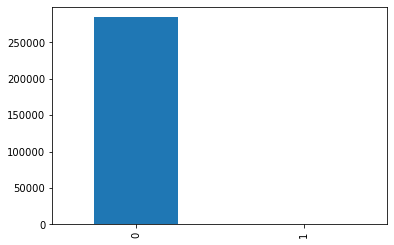

In [203]:
data.iloc[:,-1].value_counts().plot(kind="bar")

In [204]:
data.iloc[:,-1].value_counts() / data.iloc[:, -1].count() * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

/Users/jk/setup/anaconda3/envs/python_pro2net/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jk/setup/anaconda3/envs/python_pro2net/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


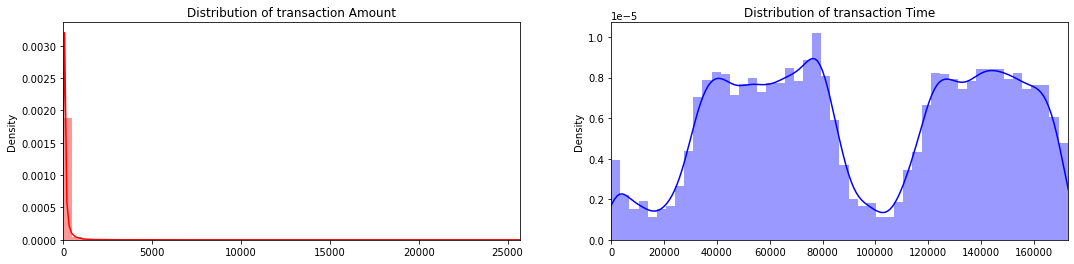

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = data['Amount'].values
time_val = data["Time"].values

sns.distplot(amount_val, ax=ax[0], color="r")
ax[0].set_title("Distribution of transaction Amount")
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color="b")
ax[1].set_title("Distribution of transaction Time")
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [206]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np

scaler = StandardScaler()

data["scaled_amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))

In [207]:
data["loged_amount"] = np.log1p(data["Amount"].values.reshape(-1, 1))

/Users/jk/setup/anaconda3/envs/python_pro2net/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jk/setup/anaconda3/envs/python_pro2net/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


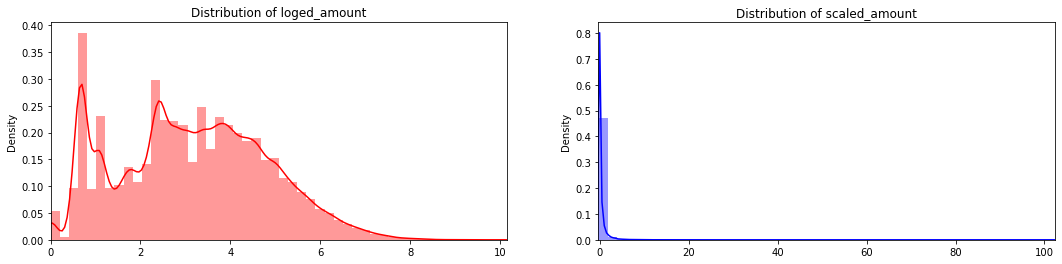

In [208]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
loged_amount = data["loged_amount"].values
scaled_amount = data["scaled_amount"].values

sns.distplot(loged_amount, ax=ax[0], color="r")
ax[0].set_title("Distribution of loged_amount")
ax[0].set_xlim([min(loged_amount), max(loged_amount)])

sns.distplot(scaled_amount, ax=ax[1], color="b")
ax[1].set_title("Distribution of scaled_amount")
ax[1].set_xlim([min(scaled_amount), max(scaled_amount)])

plt.show()

In [209]:
rob_scaler = RobustScaler()

data["scaled_time"] = rob_scaler.fit_transform(data["Time"].values.reshape(-1, 1))
data["loged_time"] = np.log1p(data["Time"].values.reshape(-1, 1))
data["std_time"] = scaler.fit_transform(data["Time"].values.reshape(-1, 1))

/Users/jk/setup/anaconda3/envs/python_pro2net/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jk/setup/anaconda3/envs/python_pro2net/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jk/setup/anaconda3/envs/python_pro2net/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

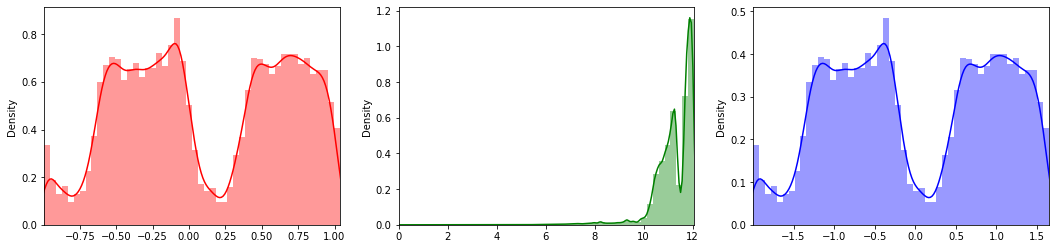

In [210]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
scaled_time = data["scaled_time"].values
loged_time = data["loged_time"].values
std_time = data["std_time"].values

sns.distplot(scaled_time, ax=ax[0], color='r')
ax[0].set_xlim([min(scaled_time), max(scaled_time)])

sns.distplot(loged_time, ax=ax[1], color="g")
ax[1].set_xlim([min(loged_time), max(loged_time)])

sns.distplot(std_time, ax=ax[2], color="b")
ax[2].set_xlim([min(std_time), max(std_time)])

plt.show()

In [211]:
data.drop(["loged_time", "std_time", "loged_amount", "Time", "Amount"], axis=1, inplace=True)

In [212]:
scaled_amount = data["scaled_amount"]
scaled_time = data["scaled_time"]
data.drop(["scaled_amount", "scaled_time"], axis=1, inplace=True)
data.insert(0, "scaled_amount", scaled_amount)
data.insert(1, "scaled_time", scaled_time)

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  284807 non-null  float64
 1   scaled_time    284807 non-null  float64
 2   V1             284807 non-null  float64
 3   V2             284807 non-null  float64
 4   V3             284807 non-null  float64
 5   V4             284807 non-null  float64
 6   V5             284807 non-null  float64
 7   V6             284807 non-null  float64
 8   V7             284807 non-null  float64
 9   V8             284807 non-null  float64
 10  V9             284807 non-null  float64
 11  V10            284807 non-null  float64
 12  V11            284807 non-null  float64
 13  V12            284807 non-null  float64
 14  V13            284807 non-null  float64
 15  V14            284807 non-null  float64
 16  V15            284807 non-null  float64
 17  V16            284807 non-nul

Text(0.5, 1.0, 'V17 vs Class')

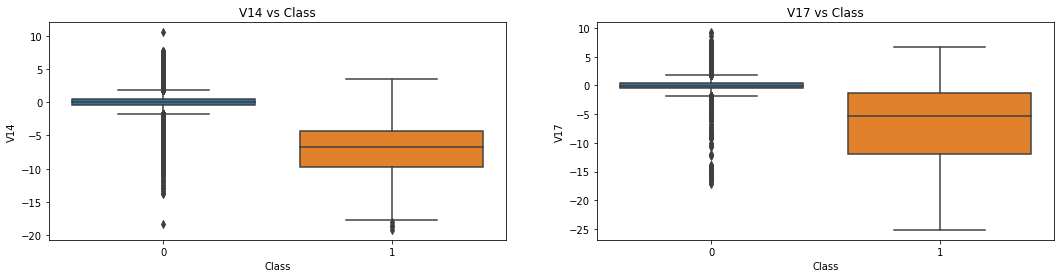

In [214]:
f, axes = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(x="Class", y="V14", data=data, ax=axes[0])
axes[0].set_title("V14 vs Class")

sns.boxplot(x="Class", y="V17", data=data, ax=axes[1])
axes[1].set_title("V17 vs Class")

In [215]:
data_copy = data.copy()

In [216]:
def remove_outlier_test(data_cp, col):
    data_column = data_cp[data_cp["Class"] == 1][col]
    # data_column = data_cp[data_cp["Class"] == 0][col]
    q_25 = np.percentile(data_column.values, 25)
    q_75 = np.percentile(data_column.values, 75)
    
    iqr_15 = (q_75 - q_25) * 1.5
    lowest = q_25 - iqr_15
    highest = q_75 + iqr_15
    outlier_index = data_column[(data_column < lowest) | (data_column > highest)].index
    print(len(outlier_index))
    data_cp.drop(outlier_index, axis=0, inplace=True)
    print(data_cp.shape)
    return data_cp

In [217]:
data_copy = remove_outlier_test(data_copy, "V14")

4
(284803, 31)


In [218]:
label = data_copy.pop("Class")

In [219]:
train_data, test_data, train_label, test_label = train_test_split(data_copy, label, test_size=0.25, random_state=10)
print(train_label.value_counts() / train_label.count() * 100)
print(test_label.value_counts() / test_label.count() * 100)

0    99.837548
1     0.162452
Name: Class, dtype: float64
0    99.801969
1     0.198031
Name: Class, dtype: float64


In [220]:
# tpr = recall, 민감도 = 재현도, roc 커브의 y 축
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred, average="macro")
    print(f"정확도 : {accuracy:.2f}, 정밀도 : {precision:.2f}, 재현율: {recall:.2f}")
    print(f"f1-score: {f1:.2f}, auc: {roc_score:.2f}")

In [221]:
def modeling(model, train_data, test_data, train_label, test_label):
    model.fit(train_data, train_label)
    pred = model.predict(test_data)
    metrics(test_label, pred)

In [222]:
# LogisticRegression 데이터 정규화 및 v14 class==1 일때의 outlier를 제거 후
lr = LogisticRegression()
modeling(lr, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.89, 재현율: 0.57
f1-score: 0.70, auc: 0.79


In [223]:
# LGBMClassifier 데이터 정규화 및 v14 class==1 일때의 outlier를 제거 후
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.96, 재현율: 0.74
f1-score: 0.84, auc: 0.87


In [197]:
# LogisticRegression 데이터 정규화 및 v14 class==0 일때의 outlier를 제거 후
lr = LogisticRegression()
modeling(lr, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.99, 재현율: 0.82
f1-score: 0.90, auc: 0.91


In [198]:
# LGBMClassifier 데이터 정규화 및 v14 class==0 일때의 outlier를 제거 후
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.98, 재현율: 0.81
f1-score: 0.89, auc: 0.90


In [172]:
# LogisticRegression 데이터 정규화 및 outlier를 잘못 제거 후
lr = LogisticRegression()
modeling(lr, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.00, 재현율: 0.00
f1-score: 0.00, auc: 0.50


In [173]:
# LGBMClassifier 데이터 정규화 및 outlier를 잘못 제거 후
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.00, 재현율: 0.00
f1-score: 0.00, auc: 0.50


/Users/jk/setup/anaconda3/envs/python_pro2net/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# LogisticRegression 데이터 정규화 후
lr = LogisticRegression()
modeling(lr, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.87, 재현율: 0.65
f1-score: 0.75, auc: 0.83


In [70]:
# LGBMClassifier 데이터 정규화 후
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.95, 재현율: 0.83
f1-score: 0.88, auc: 0.91


In [15]:
# LogisticRegression 데이터 정규화 전
lr = LogisticRegression()
modeling(lr, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.73, 재현율: 0.74
f1-score: 0.73, auc: 0.87


In [23]:
# LGBMClassifier 데이터 정규화 전
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, train_data, test_data, train_label, test_label)

정확도 : 1.00, 정밀도 : 0.95, 재현율: 0.83
f1-score: 0.88, auc: 0.91
